In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [31]:
#Read the data
data1 = pd.read_csv("50_Startups.csv")
data1.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [33]:
#check for missing values
data1.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [34]:
data1.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


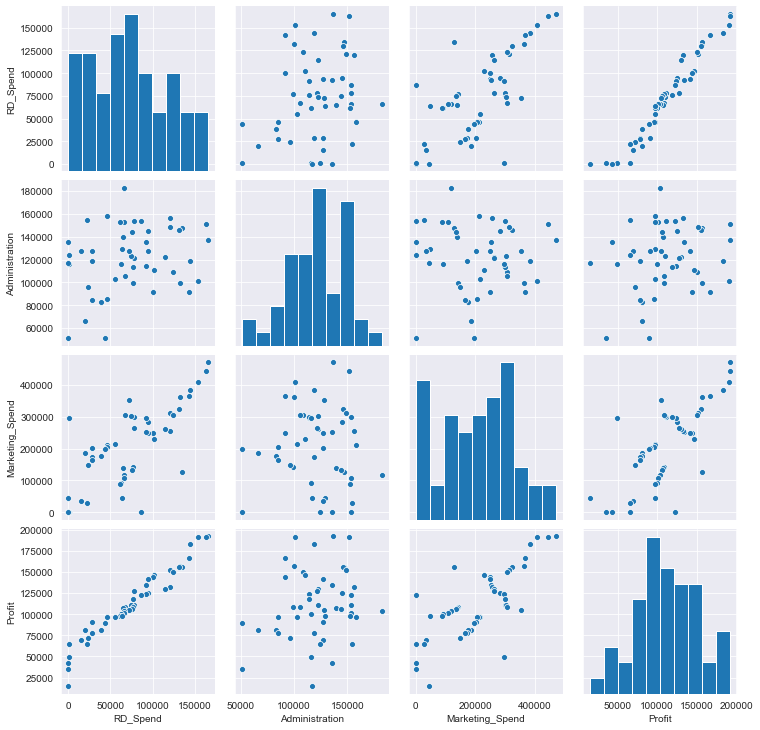

In [35]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [36]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=data1).fit()

In [38]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RD_Spend                 0.806023
Administration          -0.027004
Marketing_Spend          0.026980
dtype: float64

In [39]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
RD_Spend             17.368580
Administration       -0.517012
Marketing_Spend       1.573889
dtype: float64 
 Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
RD_Spend             2.578772e-21
Administration       6.077373e-01
Marketing_Spend      1.226769e-01
dtype: float64


In [40]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.34e-27
Time:                        14:03:36   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RD_Spend              0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend       0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""